In [13]:
import matplotlib.pyplot as plt
import numpy as np
from math import log, sqrt

# Problem 3a {-}

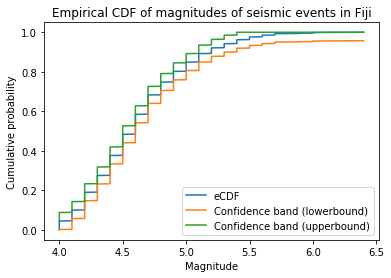

In [48]:
# Load data
data = np.loadtxt('../data/fiji.txt')
magnitudes = data[:,4]
n = len(magnitudes)

# Plot eCDF
mag_sorted = np.sort(magnitudes)
ranks = np.linspace(0, 1, n)
plt.plot(mag_sorted, ranks, label='eCDF')

# Plot confidence bands
alpha = 0.05
eps = sqrt((1 / (2 * n)) * log(2 / alpha))
lower = np.where(ranks - eps > 0, ranks - eps, 0)
upper = np.where(ranks + eps < 1, ranks + eps, 1)
plt.plot(mag_sorted, lower, label='Confidence band (lowerbound)')
plt.plot(mag_sorted, upper, label='Confidence band (upperbound)')

plt.title('Empirical CDF of magnitudes of seismic events in Fiji')
plt.xlabel('Magnitude')
plt.ylabel('Cumulative probability')
plt.legend()
plt.show()

# Problem 3b {-}

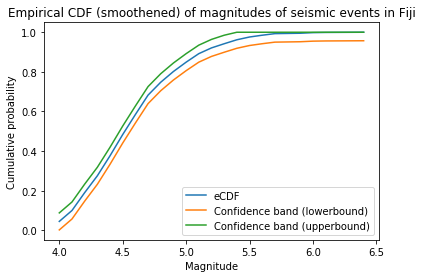

In [50]:
# Remove all duplicates, only leaving the max eCDF value for each value of magnitude
bool_array = np.zeros(n, dtype=bool)
for i in range(n):
    if i == (n - 1) or mag_sorted[i+1] != mag_sorted[i]:
        bool_array[i] = 1
        
mag_sorted_unique = mag_sorted[bool_array]
plt.plot(mag_sorted_unique, ranks[bool_array], label='eCDF')
plt.plot(mag_sorted_unique, lower[bool_array], label='Confidence band (lowerbound)')
plt.plot(mag_sorted_unique, upper[bool_array], label='Confidence band (upperbound)')

plt.title('Empirical CDF (smoothened) of magnitudes of seismic events in Fiji')
plt.xlabel('Magnitude')
plt.ylabel('Cumulative probability')
plt.legend()
plt.show()